In [1]:
# Data processing
# ==============================================================================

import pandas as pd
from collections import Counter
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Modelling and Forecasting
# ==============================================================================

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Plotting
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a81060586/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/a81060586/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Load the dataset
# ==============================================================================
data = pd.read_csv("spam.csv",encoding='ISO-8859-1')

# Display the first few rows of the dataset
# ==============================================================================
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
# Drop unncessary columns 
# ==============================================================================

data = data.drop(columns=['Unnamed: 2',	'Unnamed: 3', 'Unnamed: 4'])

In [4]:
# Rename columns 
# ==============================================================================

data = data.rename(columns={'v1':'OUTPUT','v2':'TEXT'})

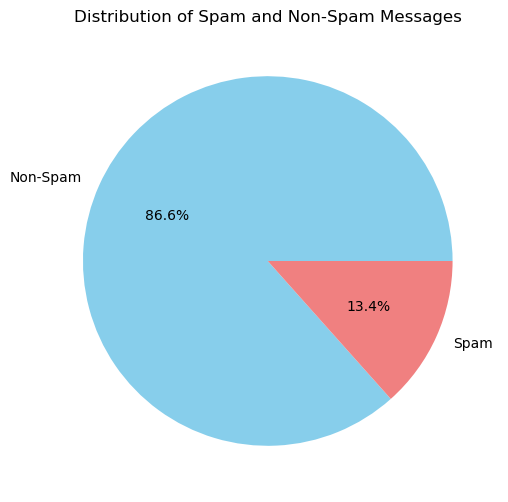

In [5]:
# Distribution of spam and non-spam messages
# ==============================================================================

spam_count = data['OUTPUT'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(spam_count, labels=['Non-Spam', 'Spam'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Spam and Non-Spam Messages')
plt.show()



/Users/a81060586/anaconda3/envs/nlp_gp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/a81060586/anaconda3/envs/nlp_gp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/a81060586/anaconda3/envs/nlp_gp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/a81060586/anaconda3/envs/nlp_gp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

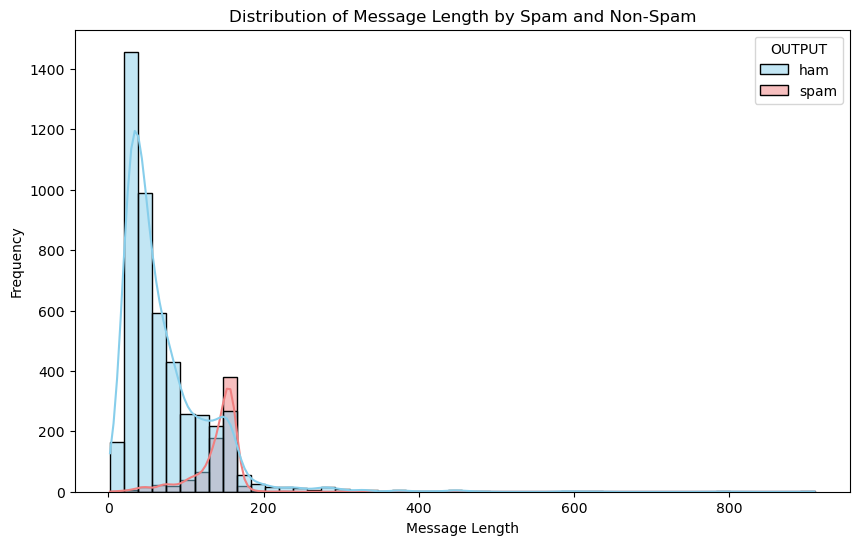

In [6]:
# Message length analysis
# ==============================================================================

data['Message_Length'] = data['TEXT'].apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Message_Length', hue='OUTPUT', bins=50, kde=True, palette=['skyblue', 'lightcoral'])
plt.title('Distribution of Message Length by Spam and Non-Spam')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


In [7]:
# Tokenize text  
# ==============================================================================

def tokenize_text(text):
    tokens = word_tokenize(text)
    print("Tokens before filtering:", tokens)
    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalnum()]
    print("Tokens after removing punctuation and converting to lowercase:", tokens)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    print("Tokens after removing stopwords:", tokens)
    return tokens


# Tokenize and count words for spam and non-spam messages
spam_words = data[data['OUTPUT'] == 1]['TEXT'].apply(lambda x: tokenize_text(x))
non_spam_words = data[data['OUTPUT'] == 0]['TEXT'].apply(lambda x: tokenize_text(x))

# Filter out empty token lists
spam_words = spam_words[spam_words.apply(len) > 0]
non_spam_words = non_spam_words[non_spam_words.apply(len) > 0]

# Print lengths of token lists for debugging
print("Length of spam token lists:", spam_words.apply(len))
print("Length of non-spam token lists:", non_spam_words.apply(len))

# Flatten the list of lists
spam_words_flat = [word for sublist in spam_words for word in sublist]
non_spam_words_flat = [word for sublist in non_spam_words for word in sublist]

# Count word frequencies
spam_word_freq = Counter(spam_words_flat)
non_spam_word_freq = Counter(non_spam_words_flat)

# Get most common words
top_spam_words = spam_word_freq.most_common(10)
top_non_spam_words = non_spam_word_freq.most_common(10)

# Plot most common words in spam messages
# Check if top_spam_words is not empty before plotting
if top_spam_words:
    # Plot most common words in spam messages
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[word[0] for word in top_spam_words], y=[word[1] for word in top_spam_words], palette='Reds_r')
    plt.title('Top 10 Most Common Words in Spam Messages')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No spam words found.")

# Check if top_spam_words is not empty before plotting
if top_non_spam_words:
    # Plot most common words in spam messages
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[word[0] for word in top_non_spam_words], y=[word[1] for word in top_non_spam_words], palette='Blues_r')
    plt.title('Top 10 Most Common Words in Non-Spam Messages')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No spam words found.")


Length of spam token lists: Series([], Name: TEXT, dtype: object)
Length of non-spam token lists: Series([], Name: TEXT, dtype: object)
No spam words found.
No spam words found.


In [8]:
# Further analysis
# ==============================================================================


# Adjusted tokenization and cleaning functions
def tokenize_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalnum()]
    return tokens

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Clean text data
data['Cleaned_Text'] = data['TEXT'].apply(clean_text)

# Tokenize and clean the text data
data['Tokenized_Text'] = data['Cleaned_Text'].apply(tokenize_text)

# Convert lists of tokens into strings
data['Tokenized_Text'] = data['Tokenized_Text'].apply(lambda x: ' '.join(x))

# Vectorize tokenized text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # Adjust parameters as needed
X = tfidf_vectorizer.fit_transform(data['Tokenized_Text']).toarray()

# Check if vocabulary is empty
if X.shape[1] == 0:
    print("Vocabulary is empty. Adjust cleaning and tokenization steps.")
else:
    # Encode the output labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(data['OUTPUT'])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print the shapes of the training and testing sets
    print("Shape of X_train:", X_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of y_test:", y_test.shape)


Shape of X_train: (4457, 1000)
Shape of X_test: (1115, 1000)
Shape of y_train: (4457,)
Shape of y_test: (1115,)


In [9]:
# Modelling using LR 
# ==============================================================================


# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.957847533632287
Precision: 0.9813084112149533
Recall: 0.7
F1 Score: 0.8171206225680933


In [10]:
# Modelling using RF, NB, SVM  
# ==============================================================================

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predictions on the test set using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the evaluation metrics for Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

# Initialize SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predictions on the test set using SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print the evaluation metrics for SVM
print("\nSupport Vector Machine (SVM):")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Train the Naive Bayes model
nb_model.fit(X_train, y_train)

# Predictions on the test set using Naive Bayes
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Print the evaluation metrics for Naive Bayes
print("\nNaive Bayes:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)


Random Forest:
Accuracy: 0.9748878923766816
Precision: 0.9841269841269841
Recall: 0.8266666666666667
F1 Score: 0.898550724637681

Support Vector Machine (SVM):
Accuracy: 0.979372197309417
Precision: 0.9774436090225563
Recall: 0.8666666666666667
F1 Score: 0.9187279151943462

Naive Bayes:
Accuracy: 0.9766816143497757
Precision: 0.984375
Recall: 0.84
F1 Score: 0.9064748201438849


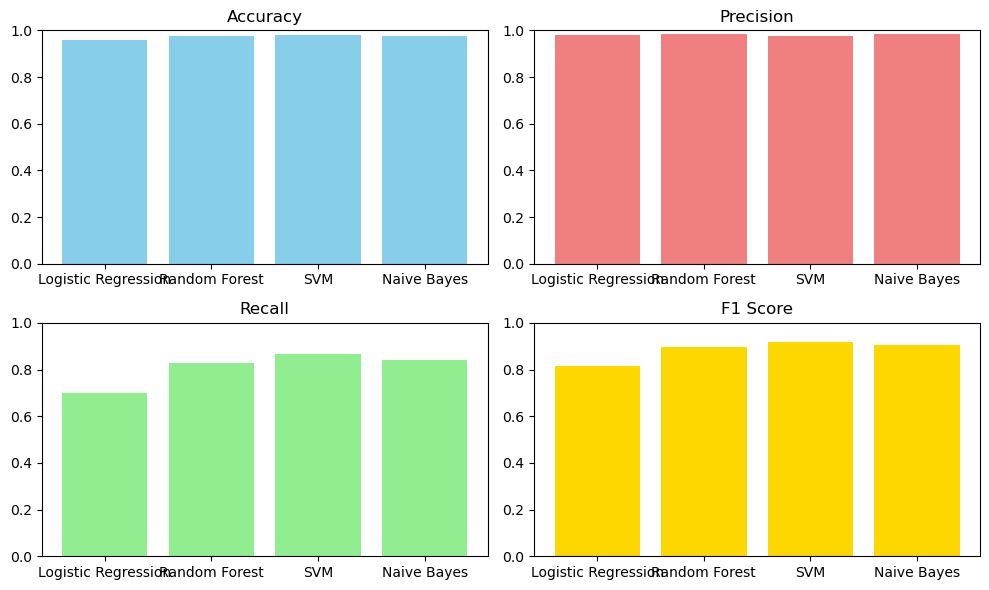

In [11]:
# Evalute using LR, RF, NB, SVM  
# ==============================================================================


# Evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']
accuracy_scores = [accuracy, accuracy_rf, accuracy_svm, accuracy_nb]
precision_scores = [precision, precision_rf, precision_svm, precision_nb]
recall_scores = [recall, recall_rf, recall_svm, recall_nb]
f1_scores = [f1, f1_rf, f1_svm, f1_nb]

# Plotting the comparison results
plt.figure(figsize=(10, 6))

# Plotting accuracy
plt.subplot(2, 2, 1)
plt.bar(models, accuracy_scores, color='skyblue')
plt.title('Accuracy')
plt.ylim(0, 1)

# Plotting precision
plt.subplot(2, 2, 2)
plt.bar(models, precision_scores, color='lightcoral')
plt.title('Precision')
plt.ylim(0, 1)

# Plotting recall
plt.subplot(2, 2, 3)
plt.bar(models, recall_scores, color='lightgreen')
plt.title('Recall')
plt.ylim(0, 1)

# Plotting F1-score
plt.subplot(2, 2, 4)
plt.bar(models, f1_scores, color='gold')
plt.title('F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
